## Домашнее задание
### 1. Апостериорное распределение для параметра распределения Пуассона.


Количество срабатываний счетчика Гейгера за минуту $n$ подчиняется распределению Пуассона:
$$
P_\lambda(n)=\frac{\lambda^n}{n !} e^{-\lambda} \text {. }
$$
1. В ходе эксперимента счетчик Гейгера сработал за минуту $m$ раз. С помощью теоремы Байеса определите апостериорное распределение на $\lambda$. Указание: априорную плотность вероятности $\lambda$ можно считать постоянной (так как мы изначально ничего не знаем про $\lambda$ ) .
2. Эксперимент повторили еще раз, в этот раз счетчик Гейгера сработал за минуту $m^{\prime}$ раз. Как обновилось апостериорное распределение на $\lambda$ ?

**Примечание.**

Такая плотность вероятности не будет нормируема. Чтобы сделать рассуждение более строгим, можно ввести обрезку на очень больших $\lambda$ (так как это нереалистичные значения). Другими словами, можно считать, что априорная плотность вероятности $p_0(\lambda)-$ это какая-то очень медленно меняющаяся функция и как-то убывающая на бесконечности. Тогда в числителе и знаменателе формулы Байеса она будет домножаться на гораздо более быструю функцию и поэтому можно заменить $p_0(\lambda) \rightarrow p_0(0)$. Константа $p_0(0)$ должна сократиться в ходе вычислений.

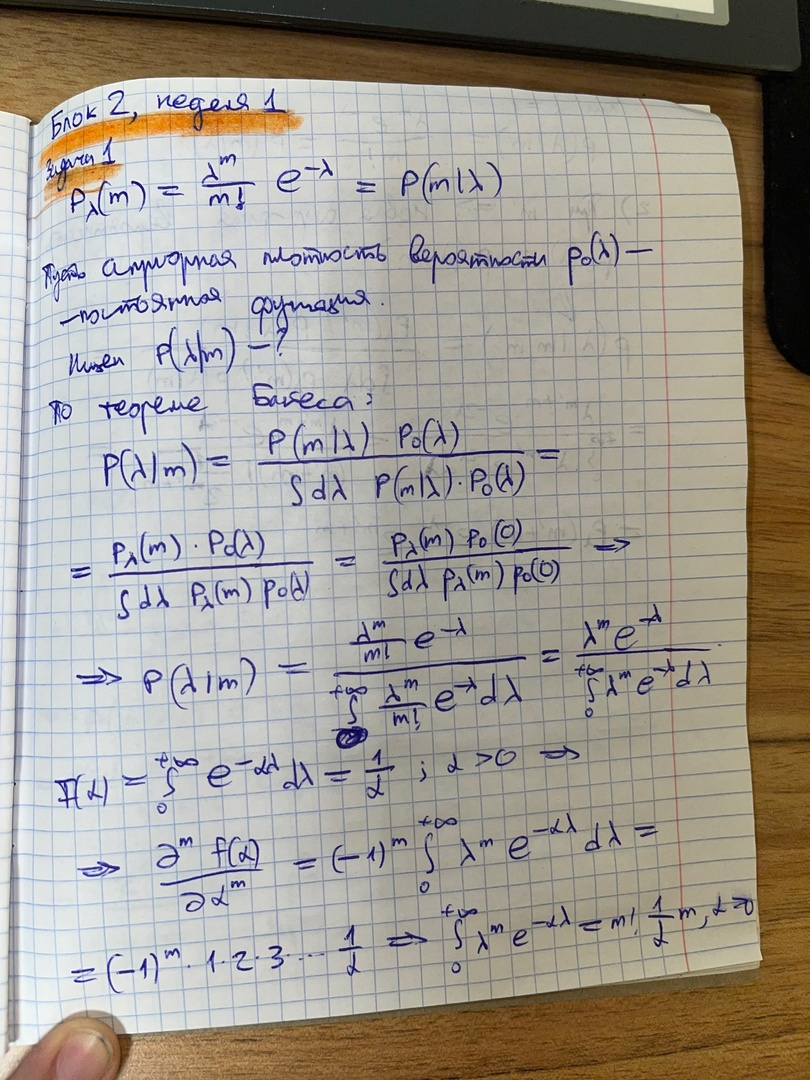

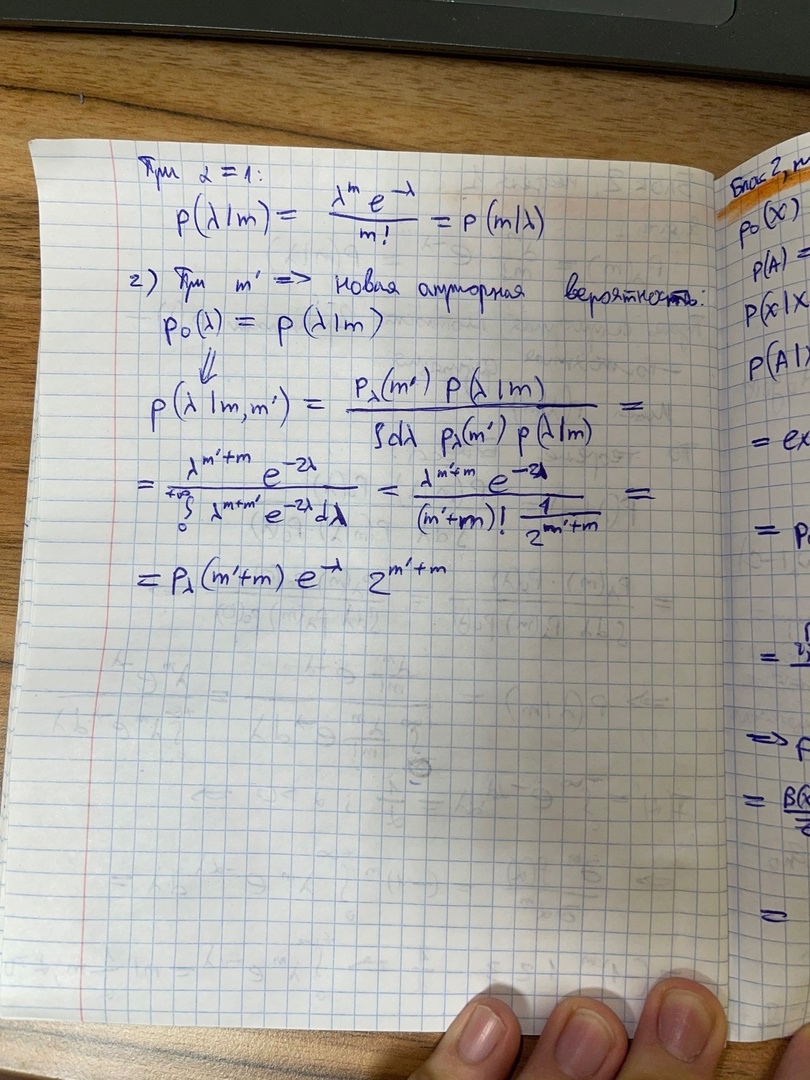

### 2. Апостериорное распределение для аргумента нормального распределения.

Пусть имеется априорное распределение на вектор $\boldsymbol{x}$, задаваемое симметричной положительно определенной матрицей $A$ :
$$
p_0(\boldsymbol{x})=\frac{1}{Z} e^{-\frac{\boldsymbol{x}^T A \boldsymbol{x}}{2}} .
$$
Было произведено измерение величин $\boldsymbol{x}$, которое дало значение $\boldsymbol{x}_1$. Найдете апостериорное распределение на $\boldsymbol{x}$.

Hint: Мы изначально ничего не знаем об $A$ - надо ввести на него какое-то априорное распределение. Предлагается брать равномерное.

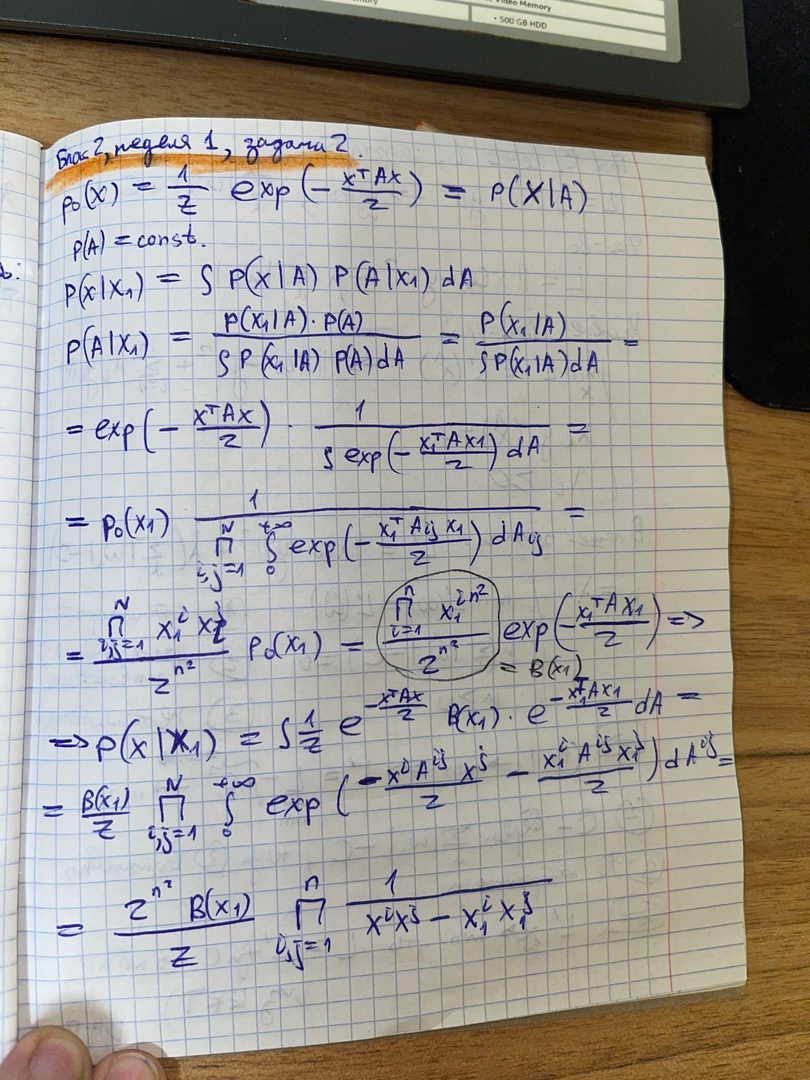

### 3. L1-регуляризация.

Для стандартного набора данных для задачи регрессии (см. например load_diabetes из sklearn.datasets) продемонстрируйте, как веса обращаются в ноль по мере увеличения коэффициента $\mu$ $L_1$-регуляризации. Разрешается использовать библиотечную реализацию регрессии, как в примере ниже:

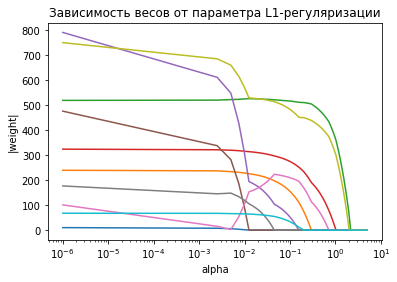

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso

data, target = load_diabetes(return_X_y=True)
a = 1e-6
alpha_linspace = np.linspace(a, 5, 2000)

weight = []

for alpha in alpha_linspace:
    lm = Lasso(alpha)
    lm.fit(data, target)
    values = lm.coef_
    
    weight.append(values)
    
plt.plot(alpha_linspace, np.abs(weight))
plt.xscale('log')
plt.xlabel('alpha')
plt.ylabel('|weight|')
plt.title('Зависимость весов от параметра L1-регуляризации')
plt.show()

### 4. K-fold кроссвалидация и L1-регуляризация градиентным спуском.

На семинаре обсуждалось решение задачи регрессии с $L 1$-регуляризацией с помощью метода градиентного спуска. C помощью K-Fold кроссвалидаций $(K=3)$ осуществите для этого метода подбор параметров: коэффициент перед регуляризатором и параметр градиентного спуска (learning rate). В качестве данных возьмите значения какой-нибудь неполиномиальной функции на равномерной или случайной сетке (на выбор семинариста) с добавленным гауссовым шумом. Насколько стабильно по отношению к запуску работает градиентный спуск?

Указание.
Можно взять функцию градиентного спуска из семинара или встроенную реализацию.  Например, можете использовать этот код

In [16]:
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold
from scipy.optimize import minimize
import itertools as it


In [17]:
def make_L1_regression_grad_descent_iteration(X, y, w, mu, alpha):
    grad = 2 * (X @ w - y) @ X + 2 * mu * np.sign(w)
    w -= alpha * grad
    return w

def f(x):
    return np.cos(0.5*x) + np.log(x)

n=300
x = np.linspace(1, 10, n)
y = f(x) + 0.2*np.random.normal(0, 0.01, size = n)

k=3

error: 15.452183610472867 mu: 0.0001 alpha: 1e-05
error: 14.098092094414326 mu: 0.001 alpha: 1e-05
error: 12.22461829793539 mu: 0.01 alpha: 1e-05
error: 11.692871863045923 mu: 0.1 alpha: 1e-05
error: 8.797761873811082 mu: 0.0001 alpha: 5e-05
error: 6.775144977796363 mu: 0.001 alpha: 5e-05
error: 5.29537677278495 mu: 0.01 alpha: 5e-05
error: 4.744989311825412 mu: 0.1 alpha: 5e-05
error: 3.9190780925491087 mu: 0.0001 alpha: 8e-05
error: 3.5899152740352838 mu: 0.001 alpha: 8e-05
error: 3.2722917646560936 mu: 0.01 alpha: 8e-05
error: 3.1515560329882257 mu: 0.0001 alpha: 0.0001
error: 3.064285891064044 mu: 0.001 alpha: 0.0001
[ 1.97486818e-07  1.84361768e+00 -5.24745904e+00 -9.20071135e-03
  2.40146226e+00  3.44645718e+00  1.01441176e+00 -1.18148857e-01
 -2.52640611e+00]
error = 0.6087009672858859


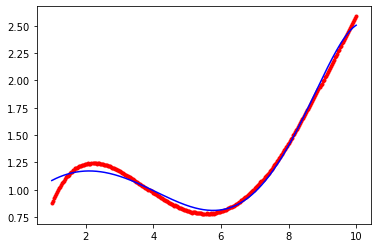

optimal params: mu: 0.001 alpha: 0.0001


In [18]:
degree = 8
poly = PolynomialFeatures(degree=degree, include_bias = True)
X_ = poly.fit_transform(x.reshape(-1, 1))
scaler = StandardScaler()
X = scaler.fit_transform(X_)

Y = (y - np.mean(y))/np.std(y)

w = np.random.random(X.shape[1])
w0 = w
#print(w)
err_0 = np.Inf
ideals = np.array([0, 0, 1e8])
for alpha in [1e-5, 5e-5, 8e-5, 1e-4]:
    for mu in [1e-4, 1e-3, 1e-2, 1e-1]:
        err = 0
        for tr, test in KFold(n_splits = k, shuffle=True).split(X):
            for _ in range(7000):
                w = make_L1_regression_grad_descent_iteration(X[tr], Y[tr], w, mu, alpha)
            #err += sklearn.metrics.mean_squared_error(X[test] @ w, y[test])*y[test].size
            err += np.sum((X[test] @ w - Y[test])**2)
        #print(err)
        #print('::', ideals[2])
        if err < ideals[2]:
            ideals[0], ideals[1], ideals[2] = mu, alpha, err
            print("error:", ideals[2], "mu:", mu, "alpha:", alpha)
            
mu, alpha = ideals[0], ideals[1]
w = make_L1_regression_grad_descent_iteration(X, Y, w0, mu, alpha)
for i in range (7000):
    w = make_L1_regression_grad_descent_iteration(X, Y, w, mu, alpha)
print(w)
plt.scatter(x, y, color="r", marker = '.')
plt.plot(x, X @ w * np.std(y) + np.mean(y), color="b")
print("error =", np.sum((X @ w * np.std(y) + np.mean(y) - y)**2))
plt.show()
print("optimal params:", "mu:", mu, "alpha:", alpha)


### 5. Лассо Тибширани: связь L1 и L2 между собой.


Покажите, что задача минимизации квадратичной функции потерь с дополнительным ограничением (лассо Тибширани):
$$
\mathcal{L}=\|X w-y\|^2 \rightarrow \min _w, \quad \sum_\alpha\left|w_\alpha\right|<C
$$
эквивалентна L1-регуляризации. Указание: можно воспользоваться условиями Каруша - Куна — Таккера (обобщение метода Лагранжа).
[Link](https://ru.wikipedia.org/wiki/%D0%A3%D1%81%D0%BB%D0%BE%D0%B2%D0%B8%D1%8F_%D0%9A%D0%B0%D1%80%D1%83%D1%88%D0%B0_%E2%80%94_%D0%9A%D1%83%D0%BD%D0%B0_%E2%80%94_%D0%A2%D0%B0%D0%BA%D0%BA%D0%B5%D1%80%D0%B0) .

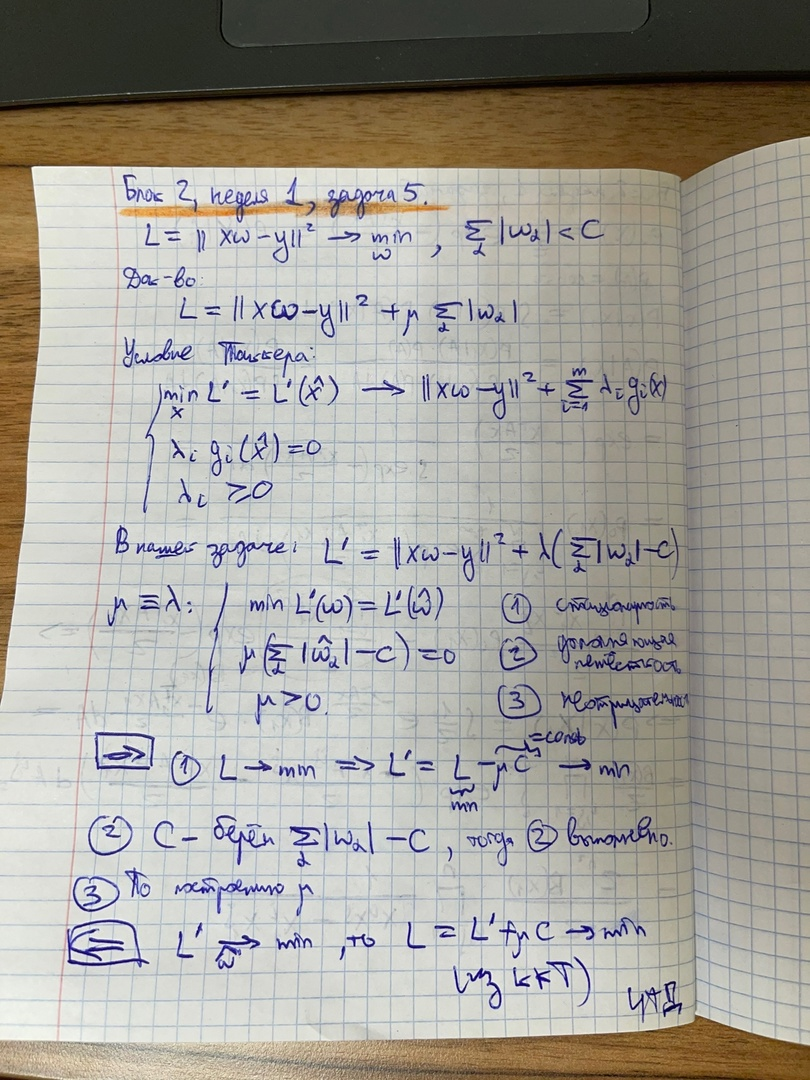